Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

Citation: The data used in this exercise originates from the following study:

Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.

It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science).

Loading data

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/challenges/data/real_estate.csv" # Importing from github

df = pd.read_csv(url)


In [2]:
print(df)

     transaction_date  house_age  transit_distance  local_convenience_stores  \
0            2012.917       32.0          84.87882                        10   
1            2012.917       19.5         306.59470                         9   
2            2013.583       13.3         561.98450                         5   
3            2013.500       13.3         561.98450                         5   
4            2012.833        5.0         390.56840                         5   
..                ...        ...               ...                       ...   
409          2013.000       13.7        4082.01500                         0   
410          2012.667        5.6          90.45606                         9   
411          2013.250       18.8         390.96960                         7   
412          2013.000        8.1         104.81010                         5   
413          2013.500        6.5          90.45606                         9   

     latitude  longitude  price_per_uni

In [3]:
data = df

data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Viewing label distributions

C:\Users\abnac\AppData\Local\Temp\ipykernel_11716\428811369.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


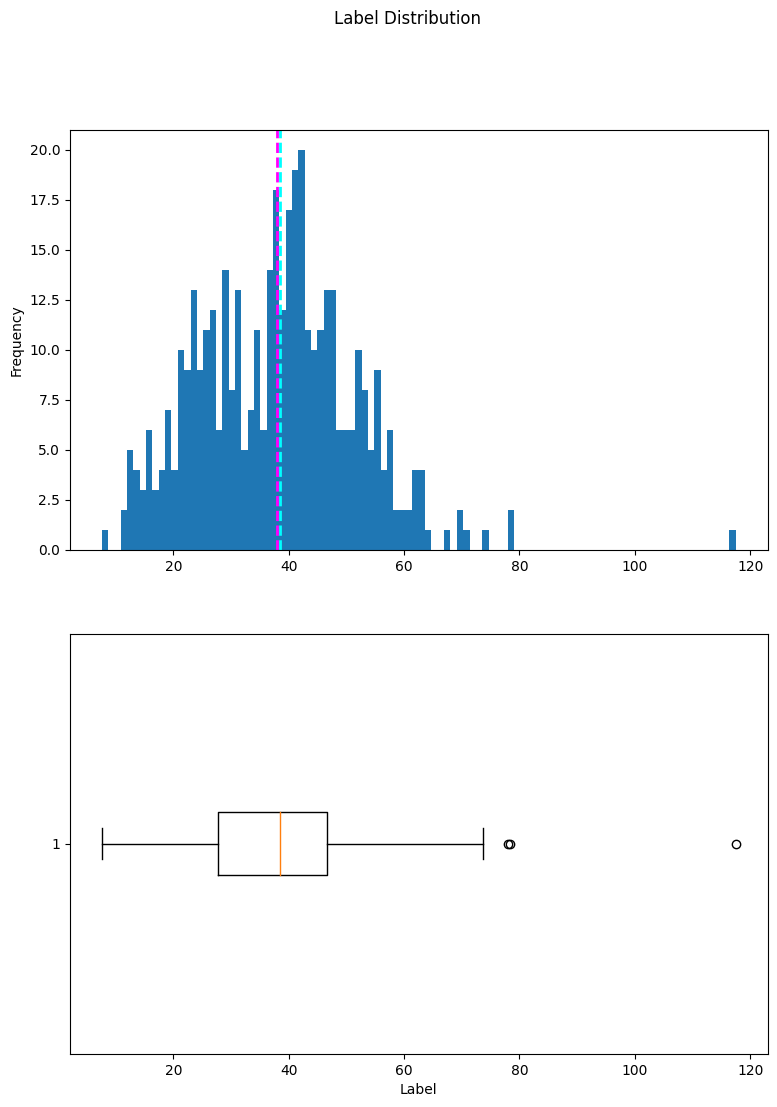

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get the label column
label = data[data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

Removing Outliers

C:\Users\abnac\AppData\Local\Temp\ipykernel_11716\2477398891.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


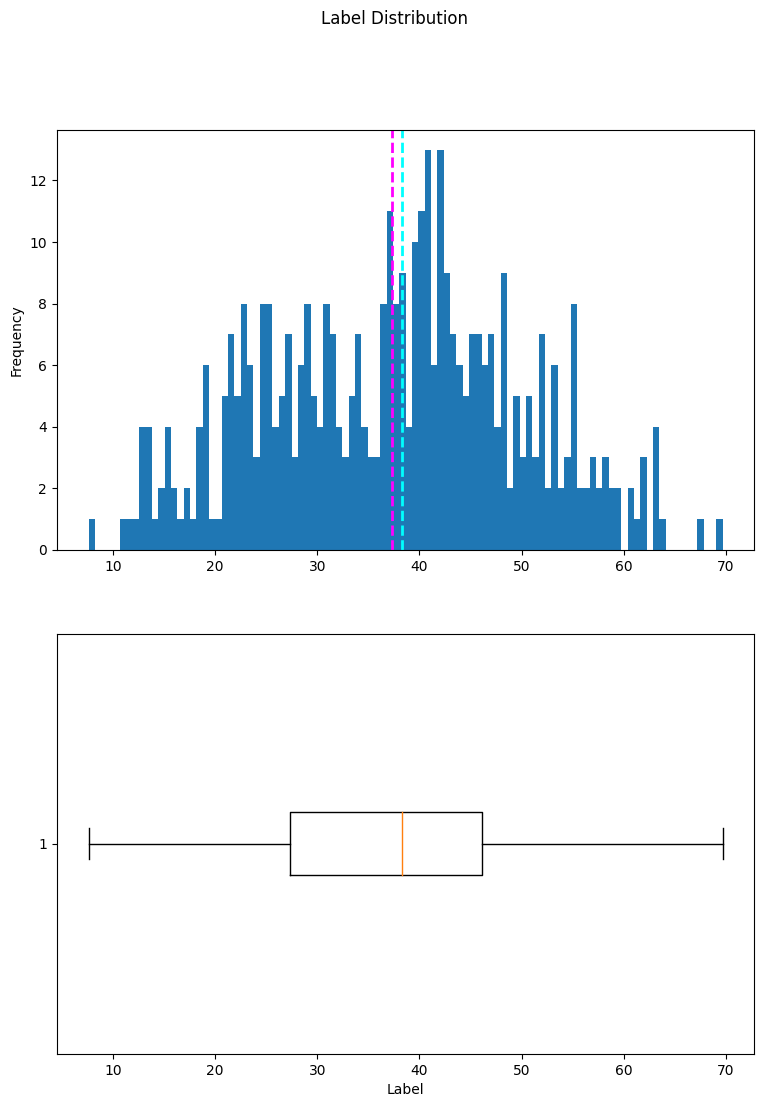

In [12]:
data = data[data['price_per_unit']<70]
# Get the label column
label = data[data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

Viewing Correlations

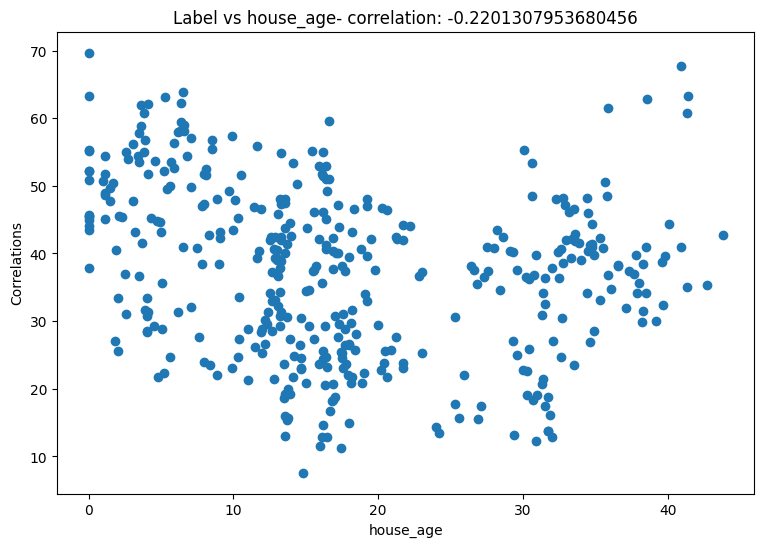

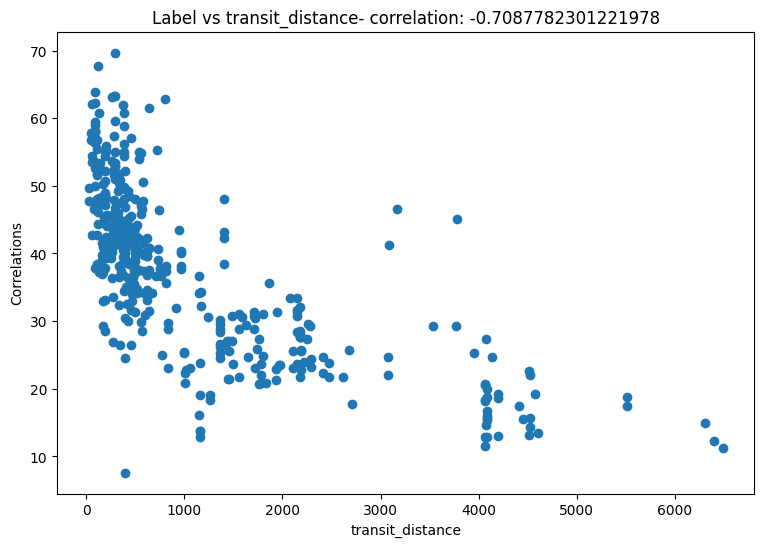

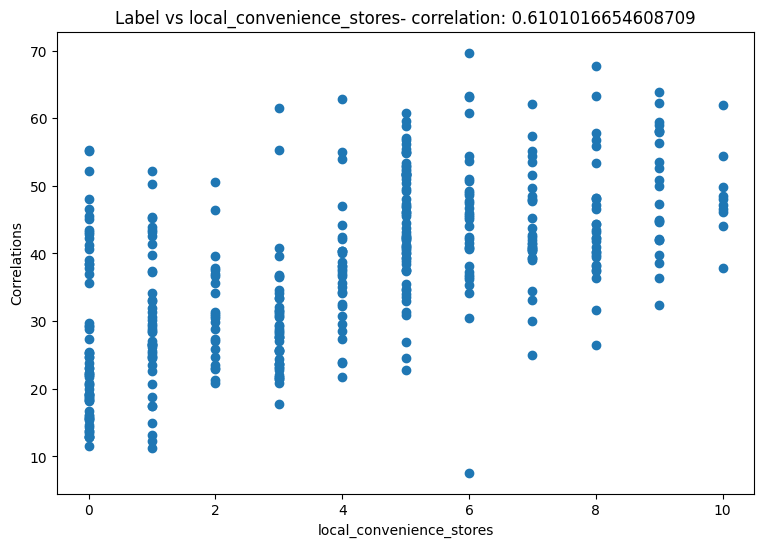

In [13]:
for col in data[data.columns[0:-1]]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()


Dropping unnecessary rows (transaction_date,latitude,longitude)

In [7]:
data.drop(labels=['transaction_date','latitude','longitude'], axis=1, inplace=True)

data.head()


,house_age,transit_distance,local_convenience_stores,price_per_unit
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


Training Model

In [17]:
# Split the data into features and target
X = df.drop('price_per_unit', axis=1)
y = df['price_per_unit']

from sklearn.model_selection import train_test_split
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 289, rows
Test Set: 125 rows


In [18]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object and fit the model to the data
reg = LinearRegression()
model = reg.fit(X, y)

print (model)

LinearRegression()


MSE: 75.57855048151436
RMSE: 8.693592495712826
R2: 0.5565269495871998


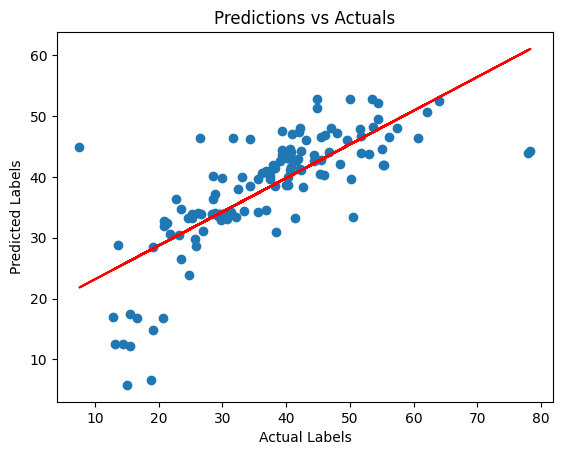

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

Using the Trained Model

In [21]:
import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5],
                  [13.6,4082.015,0]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
43.81
17.58


C:\Users\abnac\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
